# Stability of Linear Homogeneous ODEs

**Randall Romero Aguilar, PhD**

This demo is based on the original Matlab demo accompanying the  <a href="https://mitpress.mit.edu/books/applied-computational-economics-and-finance">Computational Economics and Finance</a> 2001 textbook by Mario Miranda and Paul Fackler.

Original (Matlab) CompEcon file: **demode01.m**

Running this file requires the Python version of CompEcon. This can be installed with pip by running

    !pip install compecon --upgrade

<i>Last updated: 2021-Oct-01</i>
<hr>

This demo is hard to run, because it requieres user to install ffmpeg

In [1]:
from compecon import ODE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ANIMATED = 3 # static images if 0, videos of ANIMATED seconds if positive. Requires ffmpeg

In [2]:
def annotate_line(ax, str, l, pos=0.1, **kwargs):
    
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    
    x=np.asarray(l.get_xdata())
    y=np.asarray(l.get_ydata())
    
    dx = x[1] - x[0]
    dy = y[1] - y[0]
    angle = np.arctan(dy/dx)*180/np.pi if dx else 90
    
    is_visible = (x >=xlim[0]) & (x<=xlim[1]) & (y >=ylim[0]) & (y<=ylim[1])
    x = x[is_visible]
    y = y[is_visible]
    
    xt = pos * x[-1] + (1-pos)*x[0]
    yt = pos * y[-1] + (1-pos)*y[0]
    
    ax.annotate(str, (xt,yt), rotation=angle, ha="center", **kwargs)




def phase(A,figtitle, stable=True, pos=(0.1,0.1)):
    xlim = [-1.05, 1.05]
    
    A = np.asarray(A)
    
    problems = [ODE(lambda x: A @ x, T=T,bv=bv) for bv in x0]
    
    for problem in problems:
        problem.solve_collocation()
    
    
    fig, ax = plt.subplots(figsize=[8,8])
    ax.set_aspect('equal', adjustable='box')
    
    # Compute and plot Nullclines
    xnulls_kw=dict(ls="--", color="gray")
    x1 = np.linspace(*xlim, 100)
        
    if A[0,1]:
        lx0, = ax.plot(x1, -(A[0,0]*x1)/A[0,1], **xnulls_kw)
    else:
        lx0, = ax.plot([0,0], xlim, **xnulls_kw)
    
    if A[1,1]:
        lx1, = ax.plot(x1, -(A[1,0]*x1)/A[1,1], **xnulls_kw)
    else:
        lx1, = ax.plot([0,0], xlim, **xnulls_kw)
       
    annotate_line(ax, '$\dot{y}_{0}=0$', lx0, pos=pos[0], color=xnulls_kw['color'], fontsize=16)
    annotate_line(ax, '$\dot{y}_{1}=0$', lx1, pos=pos[1], color=xnulls_kw['color'], fontsize=16)
       
    
    # Eigenvalues
    D, V = np.linalg.eig(A);
    V = np.sqrt(2)*V
    
    print('Eigenvalues', D, sep='\n')
    print('\nEigenvectors', V, sep='\n')
    
    
    if np.isreal(D[0]):
        for j in range(2):
            color = 'darkseagreen' if D[j] < 0 else 'lightcoral'
            ax.plot([-V[0,j], V[0,j]], [-V[1,j], V[1,j]], color=color)
            ax.annotate(f'$v_{j}$', V[:,j], color=color, fontsize=14)
                
    video = problem.phase(xlim, xlim, ax=ax, animated=ANIMATED,
                          x=np.array([problem.x.values.T for problem in problems]),
                          title=figtitle,
                          path_kw=dict(color="forestgreen" if stable else "firebrick"),
                          xticks=[-1,0,1], yticks=[-1,0,1]
                         )
    
     
   
    return ax.figure, video

## Example 1

Eigenvalues
[-0.5 -1. ]

Eigenvectors
[[ 1. -1.]
 [ 1.  1.]]


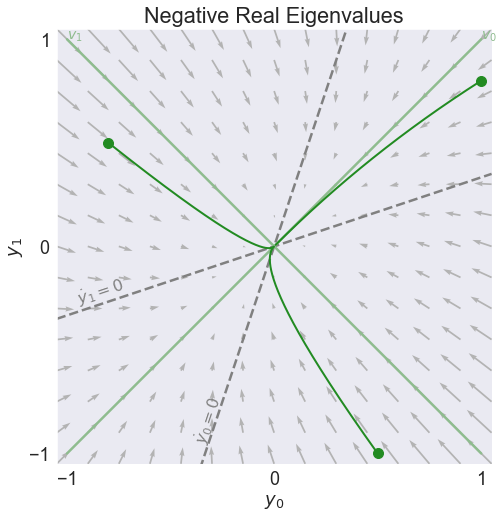

In [3]:
A = [[-0.75, 0.25],[0.25, -0.75]]
x0 = [[1.0, 0.8], [-0.8, 0.5], [0.5, -1.0]]
T = 10
fig1, video1 = phase(A,'Negative Real Eigenvalues', stable=True, pos=[0.35,0.1])
video1

## Example 2

Eigenvalues
[1.  0.5]

Eigenvectors
[[ 1.  1.]
 [-1.  1.]]


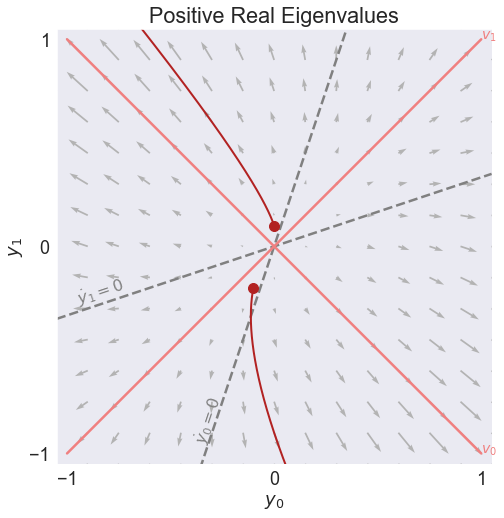

In [4]:
A = [[0.75, -0.25],[-0.25, 0.75]]
x0 = [[-0.1, -0.2], [0, 0.1]]
T = 3
fig2, video2 = phase(A,'Positive Real Eigenvalues', stable=False, pos=[0.35,0.1])
video2

## Example 3

Eigenvalues
[ 0.5 -1. ]

Eigenvectors
[[ 1. -1.]
 [ 1.  1.]]


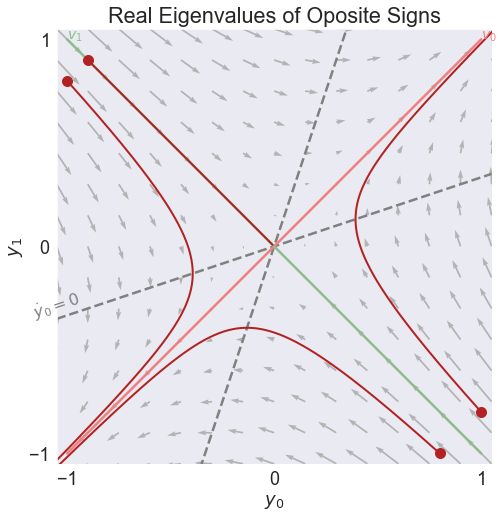

In [5]:
A = [[-0.25, 0.75],[0.75, -0.25]]
x0 = [[1.0, -0.8], [-1,0.8],[0.8,-1], [-0.9,0.9]]
T = 5
fig3, video3 = phase(A,'Real Eigenvalues of Oposite Signs', stable=False, pos=[0,0.05])
video3

## Example 4

Eigenvalues
[-0.5 -0.5]

Eigenvectors
[[1.4142 0.    ]
 [0.     1.4142]]


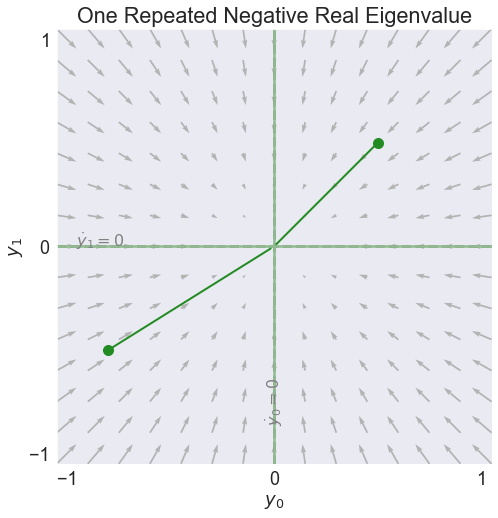

In [6]:
A = [[-0.5, 0],[0, -0.5]]
x0 = [[0.5, 0.5], [-0.8,-0.5]]
T = 8
fig4, video4 = phase(A,'One Repeated Negative Real Eigenvalue', stable=True)
video4

## Example 5

Eigenvalues
[0.5 0.5]

Eigenvectors
[[1.4142 0.    ]
 [0.     1.4142]]


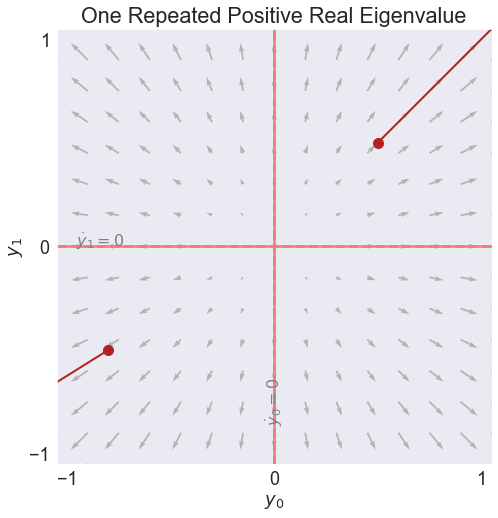

In [7]:
A = [[0.5, 0],[0, 0.5]]
x0 = [[0.5, 0.5], [-0.8,-0.5]]
T = 2
fig5, video5 = phase(A,'One Repeated Positive Real Eigenvalue', stable=False)
video5

## Example 6

Eigenvalues
[0.+1.j 0.-1.j]

Eigenvectors
[[1.+0.j 1.+0.j]
 [0.+1.j 0.-1.j]]


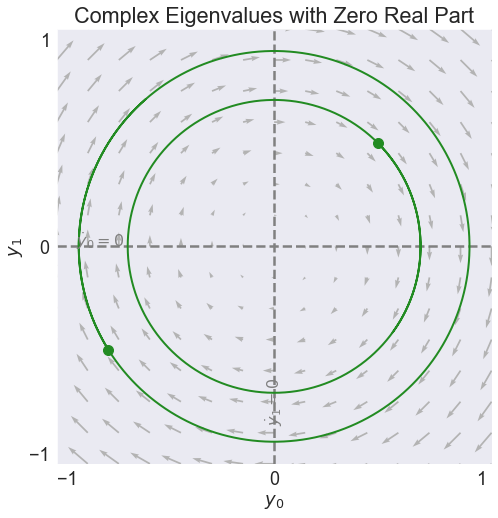

In [8]:
A = [[0, 1],[-1, 0]]
x0 = [[0.5, 0.5], [-0.8,-0.5]]
T = 8
fig6, video6 = phase(A,'Complex Eigenvalues with Zero Real Part', stable=True)
video6

## Example 7

Eigenvalues
[-0.15+0.9887j -0.15-0.9887j]

Eigenvectors
[[ 1.  +0.j      1.  +0.j    ]
 [-0.15+0.9887j -0.15-0.9887j]]


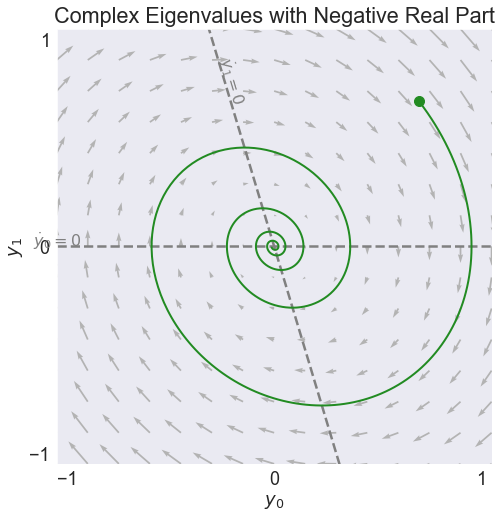

In [9]:
A = [[0, 1],[-1, -0.3]]
x0 = [[0.7, 0.7]]
T = 30
fig7, video7 = phase(A,'Complex Eigenvalues with Negative Real Part', stable=True, pos=[0,0.4])
video7

## Example 8

Eigenvalues
[0.05+0.9987j 0.05-0.9987j]

Eigenvectors
[[1.  +0.j     1.  +0.j    ]
 [0.05+0.9987j 0.05-0.9987j]]


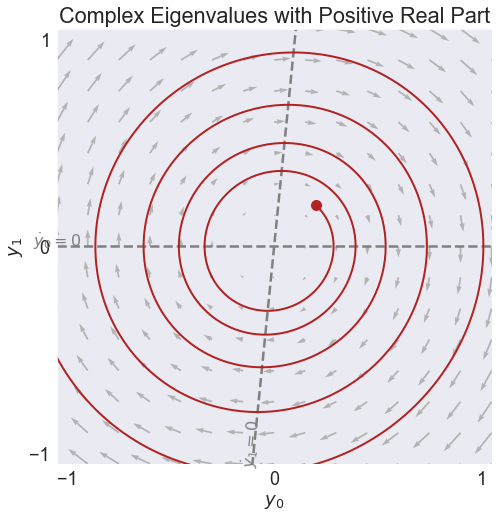

In [10]:
A = [[0, 1], [-1, 0.1]]
x0 = [[0.2, 0.2]]
T = 30
fig8, video8 = phase(A,'Complex Eigenvalues with Positive Real Part', stable=False, pos=[0,0.45])
video8

In [11]:
#for i, fig in enumerate([fig1, fig2, fig3, fig4, fig5, fig6, fig7, fig8], start=1):
#    fig.savefig(f'ode-example{i}.pdf', bbox_inches='tight')